In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

In [2]:
def balance(y):
    print('Class 0:', len(y[y == 0]))
    print('Class 1:', len(y[y == 1]))

In [3]:
def scale(df):
    scaler = StandardScaler().fit(df.drop('y', axis=1))
    scaled_data = scaler.transform(df.drop('y', axis=1))
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns[1:])
    scaled_df.insert(0, 'y', df['y'])
    return scaled_df

In [4]:
def pca(X, y):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    pca_df['y'] = y

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_df[pca_df['y'] == 0]['PC1'], pca_df[pca_df['y'] == 0]['PC2'], label='No Delirium', alpha=0.5)
    plt.scatter(pca_df[pca_df['y'] == 1]['PC1'], pca_df[pca_df['y'] == 1]['PC2'], label='Delirium', alpha=0.5, marker='x')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Resampled Dataset')
    plt.legend()
    plt.show()

In [5]:
def pca_with_outliers(X, y, mask):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    pca_df['y'] = y
    pca_df['outlier'] = ~mask  # Mark outliers

    plt.figure(figsize=(8, 6))

    # Plot non-outliers
    plt.scatter(pca_df[(pca_df['y'] == 0) & (pca_df['outlier'] == False)]['PC1'],
                pca_df[(pca_df['y'] == 0) & (pca_df['outlier'] == False)]['PC2'],
                label='No Delirium', alpha=0.5)
    plt.scatter(pca_df[(pca_df['y'] == 1) & (pca_df['outlier'] == False)]['PC1'],
                pca_df[(pca_df['y'] == 1) & (pca_df['outlier'] == False)]['PC2'],
                label='Delirium', alpha=0.5, marker='x')

    # Highlight outliers of class 0 (No Delirium) in red dots
    plt.scatter(pca_df[(pca_df['y'] == 0) & (pca_df['outlier'])]['PC1'],
                pca_df[(pca_df['y'] == 0) & (pca_df['outlier'])]['PC2'],
                color='red', alpha=0.7, edgecolors='k', label='Outliers (No Delirium)')

    # Highlight outliers of class 1 (Delirium) in red crosses
    plt.scatter(pca_df[(pca_df['y'] == 1) & (pca_df['outlier'])]['PC1'],
                pca_df[(pca_df['y'] == 1) & (pca_df['outlier'])]['PC2'],
                color='red', alpha=0.7, edgecolors='k', marker='x', label='Outliers (Delirium)')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Resampled Dataset with Outliers Highlighted')
    plt.legend()
    plt.show()

In [6]:
def outliers(df, contamination=0.05):
    iso = IsolationForest(contamination=contamination)
    yhat = iso.fit_predict(df.drop('y', axis=1).values)
    mask = yhat != -1
    return mask

In [7]:
# load original dataset
df = pd.read_csv('dataset/delirium/top5.csv')
df = df.drop(df.columns[-1], axis=1)
df.columns = ['y'] + ['x' + str(i) for i in range(1, len(df.columns))]
df['y'] = df['y'].map({'No Delirium': 0, 'Delirium': 1, 'No_Delirium': 0})

In [8]:
df = scale(df)
X = df.drop('y', axis=1).values
y = df['y'].values

Class 0: 20
Class 1: 34


/var/folders/40/2nsl__yd3gz21y383txq3hzm0000gn/T/ipykernel_34704/3725062711.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(pca_df[(pca_df['y'] == 1) & (pca_df['outlier'])]['PC1'],


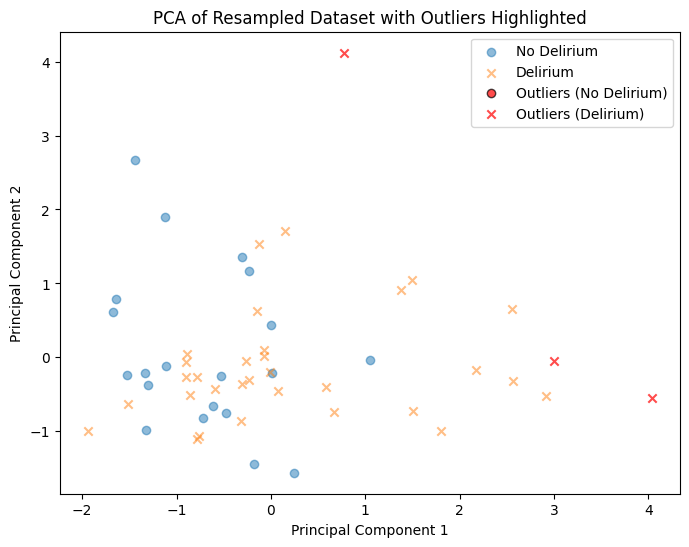

In [9]:
balance(y)
mask = outliers(df)
pca_with_outliers(X, y, mask)

In [10]:
smote = SMOTE(random_state=42)
Xr, yr = smote.fit_resample(X, y)
# generate df from resampled data
dfr = pd.DataFrame(data=Xr, columns=df.columns[1:])
dfr.insert(0, 'y', yr)

Class 0: 34
Class 1: 34


/var/folders/40/2nsl__yd3gz21y383txq3hzm0000gn/T/ipykernel_34704/3725062711.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(pca_df[(pca_df['y'] == 1) & (pca_df['outlier'])]['PC1'],


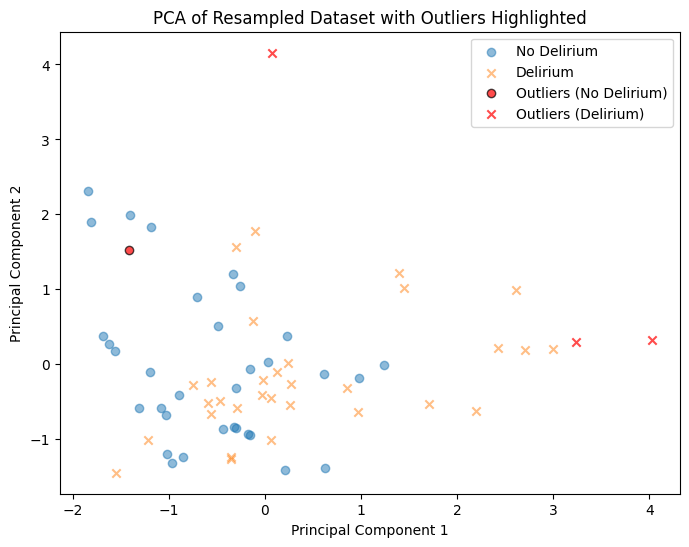

In [11]:
balance(yr)
maskr = outliers(dfr)
pca_with_outliers(Xr, yr, maskr)

In [13]:
from imblearn.combine import SMOTETomek
smotetomek = SMOTETomek(random_state=42)
Xr2, yr2 = smotetomek.fit_resample(X, y)
# generate df from resampled data
dfr2 = pd.DataFrame(data=Xr2, columns=df.columns[1:])
dfr2.insert(0, 'y', yr2)

Class 0: 32
Class 1: 32


/var/folders/40/2nsl__yd3gz21y383txq3hzm0000gn/T/ipykernel_34704/3725062711.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(pca_df[(pca_df['y'] == 1) & (pca_df['outlier'])]['PC1'],


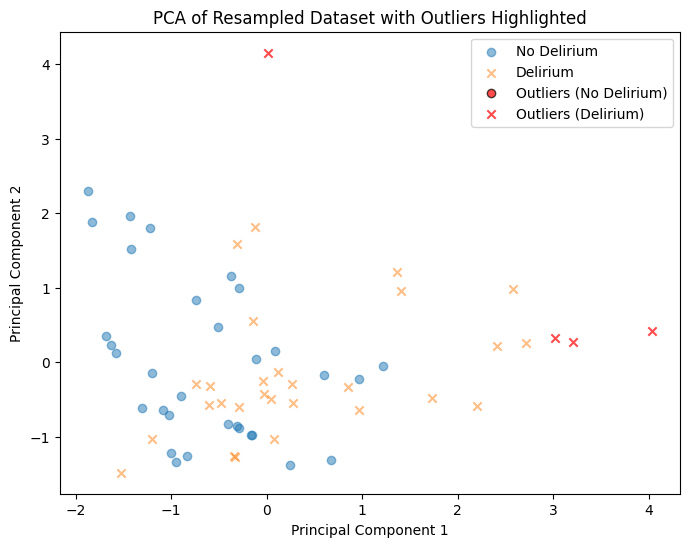

In [14]:
balance(yr2)
maskr2 = outliers(dfr2)
pca_with_outliers(Xr2, yr2, maskr2)

# add gaussian noise a bit

In [84]:
def add_gaussian_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    augmented_data = data + noise
    return augmented_data

In [87]:
def add_gaussian_noise_stds(data, std_devs, noise_fraction=0.05):
    noise = np.zeros_like(data)
    for i, col in enumerate(data.columns):
        feature_noise = np.random.normal(0, noise_fraction * std_devs[col], data[col].shape)
        noise[:, i] = feature_noise
    augmented_data = data.values + noise
    return augmented_data

In [155]:
def add_gaussian_noise_rowwise(data, std_devs, noise_fraction=0.35):
    augmented_data = data.copy()
    for col in data.columns:
        noise = np.random.normal(0, noise_fraction * std_devs[col], data[col].shape)
        augmented_data[col] += noise
    return augmented_data

In [156]:
stds = dfr2.std()[1:]

In [157]:
# augmented_data = add_gaussian_noise(dfr2.drop('y', axis=1), stds)
aug1 = add_gaussian_noise_rowwise(dfr2.drop('y', axis=1), stds)
aug2 = add_gaussian_noise_rowwise(dfr2.drop('y', axis=1), stds)
aug3 = add_gaussian_noise_rowwise(dfr2.drop('y', axis=1), stds)
aug4 = add_gaussian_noise_rowwise(dfr2.drop('y', axis=1), stds)

# stack augmented data with original data
augmented_df1 = pd.DataFrame(data=aug1, columns=dfr2.columns[1:])
augmented_df1.insert(0, 'y', dfr2['y'])
augmented_df2 = pd.DataFrame(data=aug2, columns=dfr2.columns[1:])
augmented_df2.insert(0, 'y', dfr2['y'])
augmented_df3 = pd.DataFrame(data=aug3, columns=dfr2.columns[1:])
augmented_df3.insert(0, 'y', dfr2['y'])
augmented_df4 = pd.DataFrame(data=aug4, columns=dfr2.columns[1:])
augmented_df4.insert(0, 'y', dfr2['y'])

# combine augmented data with original data
combined = pd.concat([augmented_df1, augmented_df2], ignore_index=True)
combined = pd.concat([combined, augmented_df3], ignore_index=True)
combined = pd.concat([combined, augmented_df4], ignore_index=True)

In [158]:
combined

,y,x1,x2,x3,x4,x5
0,0,-0.042449,0.347235,0.208634,-0.521956,0.865522
1,0,-2.051863,0.227998,-0.879599,-0.805739,0.590122
2,0,-1.457464,-0.496188,-0.204515,-1.378020,-0.383293
3,0,-1.068735,-0.567190,-0.527095,-0.401944,-0.370642
4,0,-1.084182,0.550284,0.914777,1.629266,-0.945712
...,...,...,...,...,...,...
251,0,-0.940787,-0.283083,-0.280617,-0.055075,2.651066
252,0,-0.934061,-1.052027,-0.403956,-0.226297,0.741862
253,0,1.601730,-1.680272,-0.468195,-0.699122,1.324996
254,0,-0.509814,0.059681,-0.045359,0.860184,0.255382


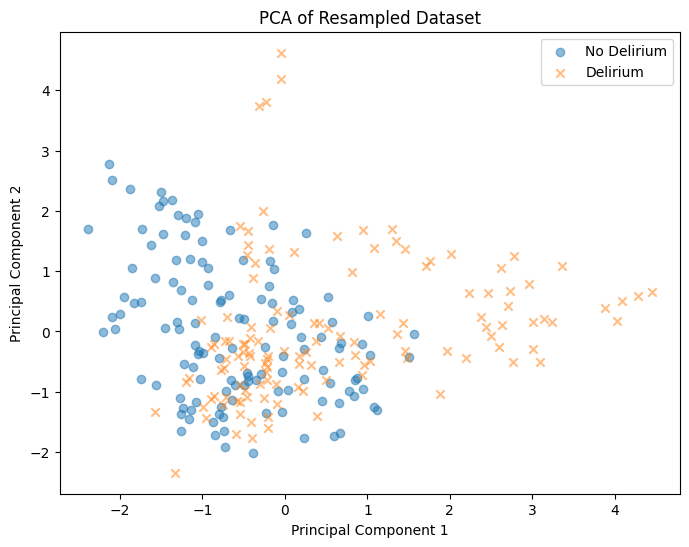

In [159]:
Xc, yc = combined.drop('y', axis=1).values, combined['y'].values
pca(Xc, yc)

# try a vae

In [125]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd

In [126]:
Xvae0 = combined[combined['y'] == 0].drop('y', axis=1).values
X_tensor0 = torch.tensor(Xvae0, dtype=torch.float32)
dataset0 = TensorDataset(X_tensor0)
dataloader0 = DataLoader(dataset0, batch_size=16, shuffle=True)

In [127]:
Xvae1 = combined[combined['y'] == 1].drop('y', axis=1).values
X_tensor1 = torch.tensor(Xvae1, dtype=torch.float32)
dataset1 = TensorDataset(X_tensor1)
dataloader1 = DataLoader(dataset1, batch_size=16, shuffle=True)

In [368]:
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        # Encoder
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc3_mean = nn.Linear(hidden_dim // 2, latent_dim)
        self.fc3_logvar = nn.Linear(hidden_dim // 2, latent_dim)
        # Decoder
        self.fc4 = nn.Linear(latent_dim, hidden_dim // 2)
        self.fc5 = nn.Linear(hidden_dim // 2, hidden_dim)
        self.fc6 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        h2 = torch.relu(self.fc2(h1))
        return self.fc3_mean(h2), self.fc3_logvar(h2)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h4 = torch.relu(self.fc4(z))
        h5 = torch.relu(self.fc5(h4))
        return self.fc6(h5)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar
    
    def loss_function(self, recon_x, x, mu, logvar):
        BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return BCE + KLD

In [369]:
class VAELarge(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAELarge, self).__init__()
        # Encoder
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc4_mean = nn.Linear(hidden_dim // 2, latent_dim)
        self.fc4_logvar = nn.Linear(hidden_dim // 2, latent_dim)
        self.dropout = nn.Dropout(0.01)
        # Decoder
        self.fc5 = nn.Linear(latent_dim, hidden_dim // 2)
        self.fc6 = nn.Linear(hidden_dim // 2, hidden_dim)
        self.fc7 = nn.Linear(hidden_dim, hidden_dim)
        self.fc8 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        h1 = self.dropout(h1)
        h2 = torch.relu(self.fc2(h1))
        h3 = torch.relu(self.fc3(h2))
        return self.fc4_mean(h3), self.fc4_logvar(h3)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h4 = torch.relu(self.fc5(z))
        h5 = torch.relu(self.fc6(h4))
        h6 = torch.relu(self.fc7(h5))
        return self.fc8(h6)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar
    
    def loss_function(self, recon_x, x, mu, logvar):
        BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return BCE + KLD

In [439]:
class BetaVAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, beta=0.8):
        super(BetaVAE, self).__init__()
        self.beta = beta
        # Encoder
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc3_mean = nn.Linear(hidden_dim // 2, latent_dim)
        self.fc3_logvar = nn.Linear(hidden_dim // 2, latent_dim)
        # Decoder
        self.fc4 = nn.Linear(latent_dim, hidden_dim // 2)
        self.fc5 = nn.Linear(hidden_dim // 2, hidden_dim)
        self.fc6 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        h2 = torch.relu(self.fc2(h1))
        return self.fc3_mean(h2), self.fc3_logvar(h2)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h4 = torch.relu(self.fc4(z))
        h5 = torch.relu(self.fc5(h4))
        return self.fc6(h5)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

    def loss_function(self, recon_x, x, mu, logvar):
        BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return BCE + self.beta * KLD

In [453]:
input_dim = Xvae0.shape[1]
hidden_dim = 256
latent_dim = 64
model0 = BetaVAE(input_dim, hidden_dim, latent_dim)
model1 = BetaVAE(input_dim, hidden_dim, latent_dim)
optimizer0 = optim.Adam(model0.parameters(), lr=1e-3)
optimizer1 = optim.Adam(model1.parameters(), lr=1e-3)

In [454]:
def train(model, dataloader, optimizer, num_epochs = 2000):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for batch in dataloader:
            data = batch[0]
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)
            loss = model.loss_function(recon_batch, data, mu, logvar)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
        print(f'Epoch {epoch + 1}, Loss: {train_loss / len(dataloader.dataset)}')

In [455]:
train(model0, dataloader0, optimizer0)

Epoch 1, Loss: 3.8020358979701996
Epoch 2, Loss: 3.477578729391098
Epoch 3, Loss: 3.4190078377723694
Epoch 4, Loss: 3.3517797589302063
Epoch 5, Loss: 3.3669402599334717
Epoch 6, Loss: 3.3128138184547424
Epoch 7, Loss: 3.3212137818336487
Epoch 8, Loss: 3.2994183897972107
Epoch 9, Loss: 3.2607067227363586
Epoch 10, Loss: 3.1895141303539276
Epoch 11, Loss: 3.273473083972931
Epoch 12, Loss: 3.1399228870868683
Epoch 13, Loss: 3.1189897656440735
Epoch 14, Loss: 3.067628040909767
Epoch 15, Loss: 3.0094836354255676
Epoch 16, Loss: 2.974234312772751
Epoch 17, Loss: 3.0261805653572083
Epoch 18, Loss: 3.133225828409195
Epoch 19, Loss: 3.0401364862918854
Epoch 20, Loss: 3.063549131155014
Epoch 21, Loss: 3.0545892119407654
Epoch 22, Loss: 2.951270028948784
Epoch 23, Loss: 2.765852302312851
Epoch 24, Loss: 2.970687687397003
Epoch 25, Loss: 3.0923726707696915
Epoch 26, Loss: 2.9070587754249573
Epoch 27, Loss: 2.862239331007004
Epoch 28, Loss: 2.74394927918911
Epoch 29, Loss: 2.813114807009697
Epoch 3

In [456]:
train(model1, dataloader1, optimizer1)

Epoch 1, Loss: 6.044108748435974
Epoch 2, Loss: 5.699556231498718
Epoch 3, Loss: 5.655360519886017
Epoch 4, Loss: 5.59470522403717
Epoch 5, Loss: 5.625196158885956
Epoch 6, Loss: 5.597985416650772
Epoch 7, Loss: 5.371547520160675
Epoch 8, Loss: 5.233174532651901
Epoch 9, Loss: 5.181222826242447
Epoch 10, Loss: 4.986981987953186
Epoch 11, Loss: 4.901566654443741
Epoch 12, Loss: 4.637372404336929
Epoch 13, Loss: 4.493610858917236
Epoch 14, Loss: 4.725740492343903
Epoch 15, Loss: 4.875820577144623
Epoch 16, Loss: 4.652644962072372
Epoch 17, Loss: 4.357516318559647
Epoch 18, Loss: 4.408542603254318
Epoch 19, Loss: 4.286955714225769
Epoch 20, Loss: 4.400045603513718
Epoch 21, Loss: 4.369063854217529
Epoch 22, Loss: 4.304826766252518
Epoch 23, Loss: 4.273776143789291
Epoch 24, Loss: 4.464434266090393
Epoch 25, Loss: 4.323133081197739
Epoch 26, Loss: 4.310038328170776
Epoch 27, Loss: 4.220850974321365
Epoch 28, Loss: 4.037910968065262
Epoch 29, Loss: 3.9073198437690735
Epoch 30, Loss: 4.17353

In [457]:
model0.eval()
with torch.no_grad():
    z = torch.randn(64, latent_dim)
    samples0 = model0.decode(z).numpy()

In [486]:
model1.eval()
with torch.no_grad():
    z = torch.randn(64, latent_dim)
    samples1 = model1.decode(z).numpy()

In [487]:
# make a single df from samples0 and samples1 where y=0 and y=1 respectively
samples0_df = pd.DataFrame(data=samples0, columns=dfr2.columns[1:])
samples0_df.insert(0, 'y', 0)
samples1_df = pd.DataFrame(data=samples1, columns=dfr2.columns[1:])
samples1_df.insert(0, 'y', 1)
samples_df = pd.concat([samples0_df, samples1_df], ignore_index=True)

In [488]:
samples_df

,y,x1,x2,x3,x4,x5
0,0,-0.380723,0.192667,0.308885,1.120809,-0.610624
1,0,-0.876404,-0.735952,-0.224866,-0.355114,-0.332485
2,0,0.019036,-0.963289,-0.157261,-0.406523,-0.498891
3,0,1.915463,-1.633780,-0.329669,-0.577945,1.069616
4,0,-1.092139,-0.102963,-0.350342,-0.433429,1.311068
...,...,...,...,...,...,...
123,1,-0.067251,0.691096,1.389448,0.272835,0.459727
124,1,-0.603953,-0.810282,-0.675526,-0.429298,-0.568226
125,1,-0.419516,-1.357127,0.178181,1.172336,0.135525
126,1,-0.309241,0.259729,-0.056327,-0.531662,-0.525796


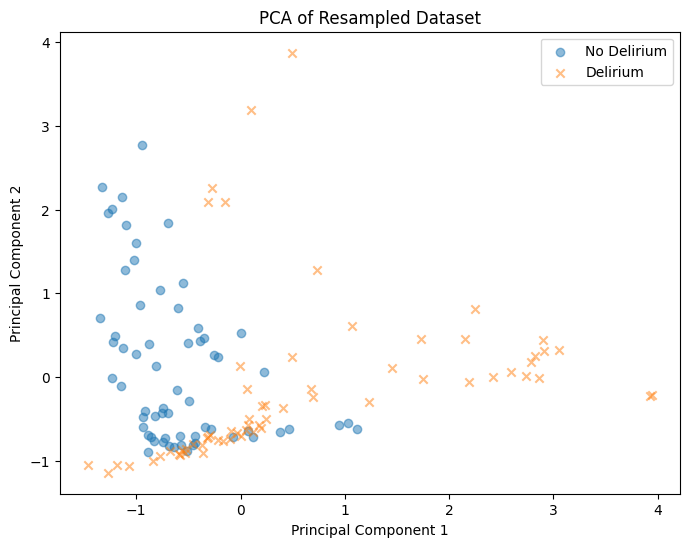

In [489]:
Xs, ys = samples_df.drop('y', axis=1).values, samples_df['y'].values
pca(Xs, ys)

In [490]:
Xm = np.vstack([Xs, X])
#ym = [1] * len(Xs) + [0] * len(X)
ym = np.concatenate([ys, y])
dfm = pd.DataFrame(data=Xm, columns=dfr2.columns[1:])
dfm.insert(0, 'y', ym)
m = np.array([False] * len(Xs) + [True] * len(X))

/var/folders/40/2nsl__yd3gz21y383txq3hzm0000gn/T/ipykernel_34704/3725062711.py:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(pca_df[(pca_df['y'] == 1) & (pca_df['outlier'])]['PC1'],


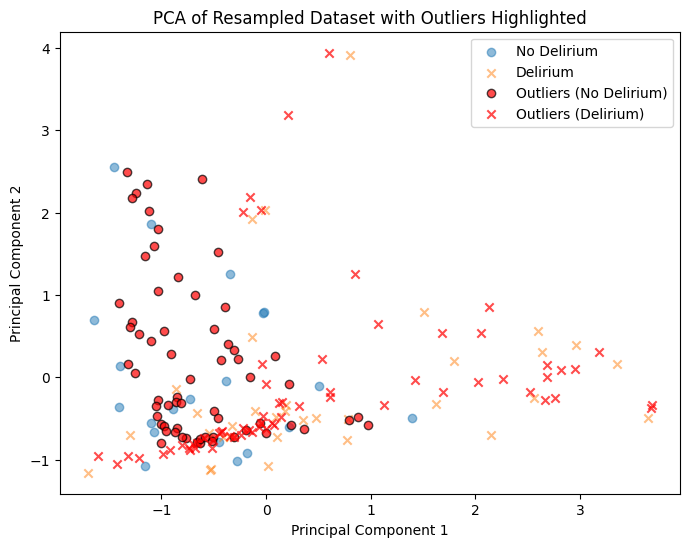

In [491]:
pca_with_outliers(Xm, ym, m)

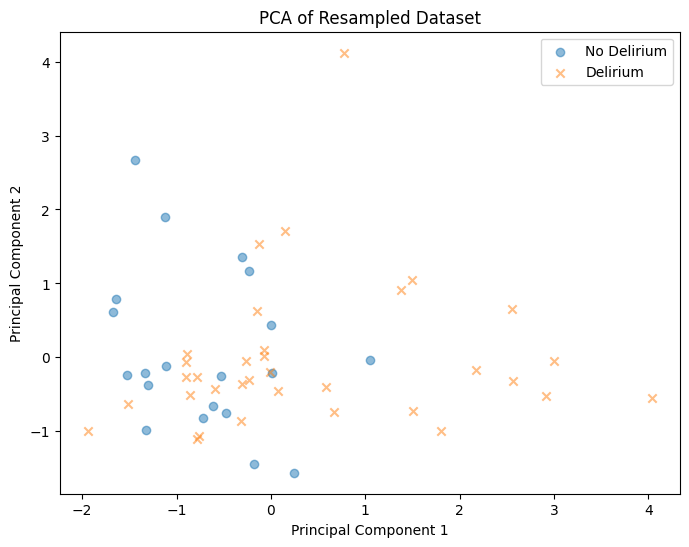

In [481]:
pca(X, y)

In [451]:
from scipy.stats import ks_2samp
ks_statistic, p_value = ks_2samp(X, Xs)
print(np.mean(ks_statistic), np.mean(p_value))

0.25416666666666665 0.050652530965922246


In [452]:
from scipy.stats import entropy
hist1, bin_edges1 = np.histogram(X, bins=50, density=True)
hist2, bin_edges2 = np.histogram(Xs, bins=50, density=True)
kl_divergence = entropy(hist1 + 1e-10, hist2 + 1e-10)
print(kl_divergence)

0.8520381581862371


In [ ]:
assert False

In [153]:
# dump the augmented data to file
samples_df.to_csv('dataset/delirium/augmented.csv', index=False)

In [160]:
combined.to_csv('dataset/delirium/noisy2.csv', index=False)

# diffusion model now

In [573]:
# Hyperparameters
T = 1000  # Number of diffusion steps
beta_start = 0.0001
beta_end = 0.02
beta = torch.linspace(beta_start, beta_end, T)
alpha = 1 - beta
alpha_cumprod = torch.cumprod(alpha, 0)

class Diffusion(nn.Module):
    def __init__(self, input_dim):
        super(Diffusion, self).__init__()
        self.fc1 = nn.Linear(input_dim + 128, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 256)
        self.fc5 = nn.Linear(256, input_dim)

        self.time_embedding = nn.Embedding(T, 128)

    def forward(self, x, t):
        t_emb = self.time_embedding(t)  # Shape: (B, 128)
        x = torch.cat([x, t_emb], dim=-1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return self.fc5(x)

def q_sample(x_0, t):
    noise = torch.randn_like(x_0)
    return torch.sqrt(alpha_cumprod[t]).view(-1, 1) * x_0 + torch.sqrt(1 - alpha_cumprod[t]).view(-1, 1) * noise

In [627]:
def train_diffusion(model, dataloader, num_epochs=2000, lr=1e-4):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    for epoch in range(num_epochs):
        for x_0 in dataloader:
            x_0 = x_0[0] # batch (B, D)
            t = torch.randint(0, T, (x_0.size(0),), device=x_0.device)
            x_t = q_sample(x_0, t)
            x_0_rec = model(x_t, t)
            loss = criterion(x_0_rec, x_0)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

In [628]:
def generate_samples(model, num_samples, input_dim):
    model.eval()
    with torch.no_grad():
        samples = torch.randn(num_samples, input_dim)
        for t in reversed(range(T)):
            t_tensor = torch.full((num_samples,), t, dtype=torch.long)
            noise = torch.randn_like(samples) if t > 0 else torch.zeros_like(samples)
            samples = (samples - model(samples, t_tensor)) / torch.sqrt(alpha[t]) + torch.sqrt(beta[t]) * noise
    return samples

In [629]:
diff0 = Diffusion(input_dim)
diff1 = Diffusion(input_dim)

In [630]:
train_diffusion(diff0, dataloader0)

Epoch 1/2000, Loss: 0.9276498556137085
Epoch 2/2000, Loss: 0.7256630659103394
Epoch 3/2000, Loss: 0.614891767501831
Epoch 4/2000, Loss: 0.6500516533851624
Epoch 5/2000, Loss: 0.4255809783935547
Epoch 6/2000, Loss: 0.7563487887382507
Epoch 7/2000, Loss: 0.5363896489143372
Epoch 8/2000, Loss: 1.149519681930542
Epoch 9/2000, Loss: 0.6829032897949219
Epoch 10/2000, Loss: 0.6832073330879211
Epoch 11/2000, Loss: 0.7114801406860352
Epoch 12/2000, Loss: 0.5467612147331238
Epoch 13/2000, Loss: 0.6335225105285645
Epoch 14/2000, Loss: 0.6100060343742371
Epoch 15/2000, Loss: 0.8139533996582031
Epoch 16/2000, Loss: 0.686474084854126
Epoch 17/2000, Loss: 0.6475337147712708
Epoch 18/2000, Loss: 0.6614998579025269
Epoch 19/2000, Loss: 0.6333849430084229
Epoch 20/2000, Loss: 0.6552732586860657
Epoch 21/2000, Loss: 0.7541937828063965
Epoch 22/2000, Loss: 0.7772397398948669
Epoch 23/2000, Loss: 0.6244097948074341
Epoch 24/2000, Loss: 0.6494253873825073
Epoch 25/2000, Loss: 0.7001703381538391
Epoch 26/200

In [631]:
train_diffusion(diff1, dataloader1)

Epoch 1/2000, Loss: 0.5293647646903992
Epoch 2/2000, Loss: 1.0535825490951538
Epoch 3/2000, Loss: 1.1088130474090576
Epoch 4/2000, Loss: 1.5892558097839355
Epoch 5/2000, Loss: 1.5744551420211792
Epoch 6/2000, Loss: 1.0475270748138428
Epoch 7/2000, Loss: 1.0258352756500244
Epoch 8/2000, Loss: 0.7145686149597168
Epoch 9/2000, Loss: 0.6625837683677673
Epoch 10/2000, Loss: 0.6116868853569031
Epoch 11/2000, Loss: 1.2425698041915894
Epoch 12/2000, Loss: 1.2123918533325195
Epoch 13/2000, Loss: 1.1486804485321045
Epoch 14/2000, Loss: 0.7543922662734985
Epoch 15/2000, Loss: 1.0721957683563232
Epoch 16/2000, Loss: 0.8644444346427917
Epoch 17/2000, Loss: 1.0293726921081543
Epoch 18/2000, Loss: 1.3313668966293335
Epoch 19/2000, Loss: 1.4462776184082031
Epoch 20/2000, Loss: 1.2182159423828125
Epoch 21/2000, Loss: 1.014841914176941
Epoch 22/2000, Loss: 0.7003870010375977
Epoch 23/2000, Loss: 0.8168767690658569
Epoch 24/2000, Loss: 0.8821166157722473
Epoch 25/2000, Loss: 1.594222068786621
Epoch 26/20

In [632]:
s0 = generate_samples(diff0, 64, input_dim)
s1 = generate_samples(diff1, 64, input_dim)

In [633]:
# make a single df from samples0 and samples1 where y=0 and y=1 respectively
s0_df = pd.DataFrame(data=s0, columns=dfr2.columns[1:])
s0_df.insert(0, 'y', 0)
s1_df = pd.DataFrame(data=s1, columns=dfr2.columns[1:])
s1_df.insert(0, 'y', 1)
sdf = pd.concat([s0_df, s1_df], ignore_index=True)

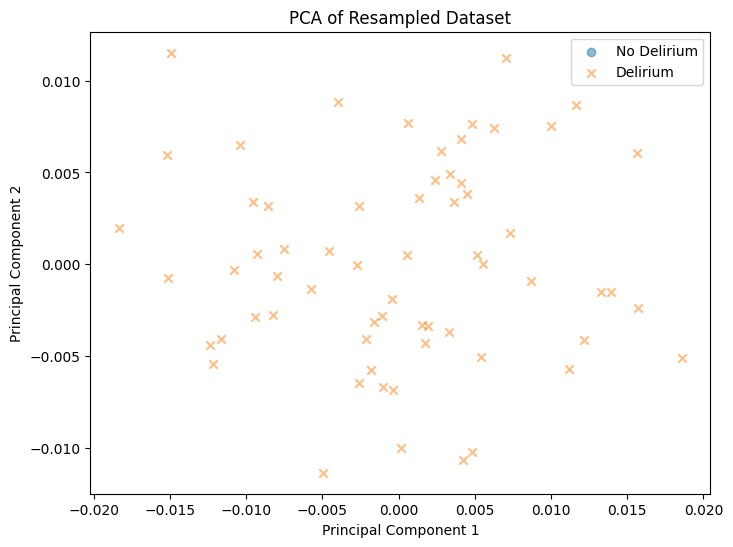

In [638]:
# filter where y = 1 
sdf = sdf[sdf['y'] == 1]
Xsdiff, ysdiff = sdf.drop('y', axis=1).values, sdf['y'].values
pca(Xsdiff, ysdiff)

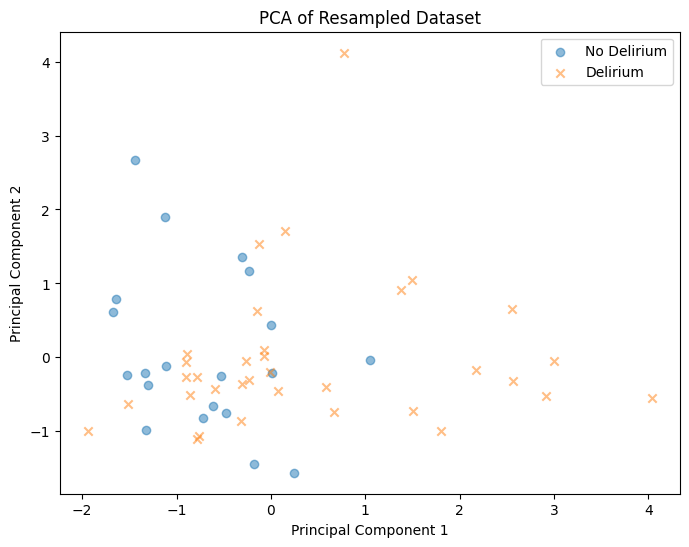

In [639]:
pca(X, y)

In [640]:
Xmdiff = np.vstack([Xsdiff, X])
#ym = [1] * len(Xs) + [0] * len(X)
ymdiff = np.concatenate([ysdiff, y])
dfmdiff = pd.DataFrame(data=Xmdiff, columns=dfr2.columns[1:])
dfmdiff.insert(0, 'y', ymdiff)
mdiff = np.array([False] * len(Xs) + [True] * len(X))

In [641]:
pca_with_outliers(Xmdiff, ymdiff, mdiff)

ValueError: Length of values (182) does not match length of index (118)